In [1]:
from google.colab import files
uploaded = files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


In [2]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

uploaded = files.upload()

Saving Wholesale customers data.csv to Wholesale customers data (1).csv


In [3]:
df = pd.read_csv("Wholesale customers data.csv")
print("Data Awal:")
print(df.head())

Data Awal:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [4]:
print("\nCek Missing Value:")
print(df.isnull().sum())


Cek Missing Value:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [5]:
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000   

In [6]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, 2:])

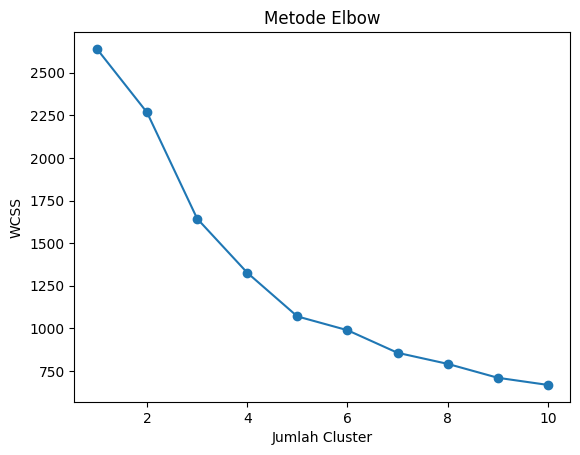

In [7]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

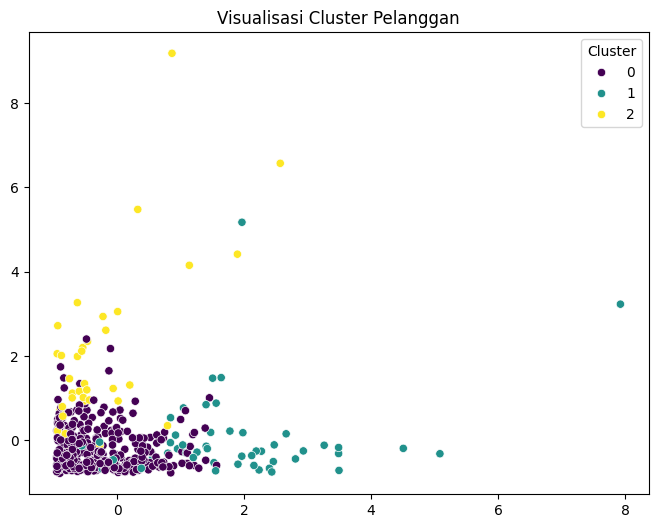

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_scaled[:,0], y=df_scaled[:,1], hue=df['Cluster'], palette='viridis')
plt.title("Visualisasi Cluster Pelanggan")
plt.show()

In [10]:
print("\nJumlah anggota setiap cluster:")
print(df['Cluster'].value_counts())


Jumlah anggota setiap cluster:
Cluster
0    350
1     53
2     37
Name: count, dtype: int64


In [11]:
print("\nRata-rata pengeluaran per cluster:")
print(df.groupby('Cluster').mean())


Rata-rata pengeluaran per cluster:
          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.282857  2.534286   8935.500000   4228.528571   5848.034286   
1        1.113208  2.698113  34540.113208   5860.358491   6122.622642   
2        2.000000  2.405405   8704.864865  20534.405405  30466.243243   

              Frozen  Detergents_Paper   Delicassen  
Cluster                                              
0        2167.231429       1913.605714  1102.120000  
1        9841.735849        981.471698  3664.245283  
2        1932.621622      14758.837838  2459.351351  


In [12]:
df.to_csv("Wholesale_customers_clustered.csv", index=False)
print("\nFile hasil clustering disimpan sebagai Wholesale_customers_clustered.csv")


File hasil clustering disimpan sebagai Wholesale_customers_clustered.csv
